In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
# here are some metrics imports
from sklearn.metrics import accuracy_score # for mean accuracy
from sklearn.metrics import balanced_accuracy_score # takes into account class sizes

# ROC-AUC
from sklearn.metrics import RocCurveDisplay

# for the full classification report
from sklearn.metrics import classification_report

# quick confusion matrices
from sklearn.metrics import confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This Jupyter notebook loads the raw amplitude and Mel spectrogram data files as numpy arrays.

Download the data files [here](https://console.cloud.google.com/storage/browser/cs181_practical_data).  This notebook assumes that the data files as located in the same directory.

### Load raw amplitude data (Ty's directory)

In [ ]:
# Load train data
X_amp_train = np.load("drive/MyDrive/Harvard/Spring 2022/CS181/Practical/data/Xtrain_amp.npy")
y_amp_train = np.load("drive/MyDrive/Harvard/Spring 2022/CS181/Practical/data/ytrain_amp.npy")

In [ ]:
print(X_amp_train.shape)


(5553, 44100)


In [ ]:
# Load test data

X_amp_test = np.load("drive/MyDrive/Harvard/Spring 2022/CS181/Practical/data/Xtest_amp.npy")
y_amp_test = np.load("drive/MyDrive/Harvard/Spring 2022/CS181/Practical/data/ytest_amp.npy")

In [ ]:
X_amp_test.shape

(2197, 44100)

### Load Mel spectrogram data (Ty's directory)

In [ ]:
# Load train data

X_mel_train = np.load("drive/MyDrive/Harvard/Spring 2022/CS181/Practical/data/Xtrain_mel.npy")
y_mel_train = np.load("drive/MyDrive/Harvard/Spring 2022/CS181/Practical/data/ytrain_mel.npy")

In [ ]:
X_mel_train.shape

(5553, 128, 87)

In [ ]:
# Flatten X_mel_train's spectrogram features
X_mel_train_flat = X_mel_train.reshape(X_mel_train.shape[0], -1)
X_mel_train_flat.shape

(5553, 11136)

In [ ]:
# Load test data

X_mel_test = np.load("drive/MyDrive/Harvard/Spring 2022/CS181/Practical/data/Xtest_mel.npy")
y_mel_test = np.load("drive/MyDrive/Harvard/Spring 2022/CS181/Practical/data/ytest_mel.npy")

In [ ]:
# Flatten X_mel_test's spectrogram features
X_mel_test_flat = X_mel_test.reshape(X_mel_test.shape[0], -1)
X_mel_test_flat.shape

(2197, 11136)

In [ ]:
X_mel_test.shape

(2197, 128, 87)

### Load raw amplitude data (Ben's directory)

In [4]:
# Load train data
X_amp_train = np.load("drive/My Drive/CS 181/Practical/data/Xtrain_amp.npy")
y_amp_train = np.load("drive/My Drive/CS 181/Practical/data/ytrain_amp.npy")

In [5]:
print(X_amp_train.shape)


(5553, 44100)


In [6]:
# Load test data

X_amp_test = np.load("drive/My Drive/CS 181/Practical/data/Xtest_amp.npy")
y_amp_test = np.load("drive/My Drive/CS 181/Practical/data/ytest_amp.npy")

In [7]:
X_amp_test.shape

(2197, 44100)

### Load Mel spectrogram data (Ben's directory)

In [8]:
# Load train data

X_mel_train = np.load("drive/My Drive/CS 181/Practical/data/Xtrain_mel.npy")
y_mel_train = np.load("drive/My Drive/CS 181/Practical/data/ytrain_mel.npy")

In [9]:
X_mel_train.shape

(5553, 128, 87)

In [10]:
# Flatten X_mel_train's spectrogram features
X_mel_train_flat = X_mel_train.reshape(X_mel_train.shape[0], -1)
X_mel_train_flat.shape

(5553, 11136)

In [11]:
# Load test data

X_mel_test = np.load("drive/My Drive/CS 181/Practical/data/Xtest_mel.npy")
y_mel_test = np.load("drive/My Drive/CS 181/Practical/data/ytest_mel.npy")

In [12]:
# Flatten X_mel_test's spectrogram features
X_mel_test_flat = X_mel_test.reshape(X_mel_test.shape[0], -1)
X_mel_test_flat.shape

(2197, 11136)

In [13]:
X_mel_test.shape

(2197, 128, 87)

### FOR REFERENCE: Delete an object from local memory.

The "del" keyword in Python is used to dereference objects from local memory.  You can use it to save memory by getting rid of variables that you don't intend to use anymore.

For example, to delete the variable X_mel_train:

In [ ]:
#del X_mel_train

# Part 1: PCA & Logistic Regression

In [37]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

##AMP

Run PCA on AMP then fit logistic regression to top 500 components

In [38]:
# create our PCA object that will calculate the first 500 components.
pca = PCA(n_components=500)

# fit our PCA to the training data, and transform our data into its 500-dimensional representation
X_amp_train_pca = pca.fit_transform(X_amp_train)

# fit our PCA to shape of our lower dim representation
print(f"Lower-Dim PCA Representation Train Data Shape: {X_amp_train_pca.shape}")

Lower-Dim PCA Representation Train Data Shape: (5553, 500)


In [39]:
# train a logistic regression on the PCA transformed training data
lr_pca = LogisticRegression(tol=0.0001, max_iter=1000, solver="saga", C=0.25)
lr_pca.fit(X_amp_train_pca, y_amp_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=0.25, max_iter=1000, solver='saga')

Checking accuracy for AMP

In [40]:
# transform our testing data (DO NOT FIT AGAIN!)
Xtest_amp_lowdim = pca.transform(X_amp_test)

# make our test predictions
preds_amp_lowdim = lr_pca.predict(Xtest_amp_lowdim)

# check our accuracy
print(f"Accuracy: {np.mean(preds_amp_lowdim == y_amp_test)}")

Accuracy: 0.20163859808830223


In [41]:
# Training Accuracy

# make our test predictions
preds_amp_lowdim_train = lr_pca.predict(X_amp_train_pca)

# check our accuracy
print(f"Accuracy: {np.mean(preds_amp_lowdim_train == y_amp_train)}")

Accuracy: 0.3951017468035296


In [42]:
# generate our classification report: precision, recall, f1, etc.
print(classification_report(y_amp_test, preds_amp_lowdim))

              precision    recall  f1-score   support

           0       0.24      0.23      0.24       300
           1       0.00      0.00      0.00        39
           2       0.25      0.67      0.37       299
           3       0.18      0.05      0.08       229
           4       0.14      0.08      0.10       264
           5       0.19      0.17      0.18       264
           6       0.00      0.00      0.00        30
           7       0.10      0.10      0.10       236
           8       0.14      0.10      0.12       236
           9       0.20      0.17      0.18       300

    accuracy                           0.20      2197
   macro avg       0.14      0.16      0.14      2197
weighted avg       0.18      0.20      0.17      2197



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


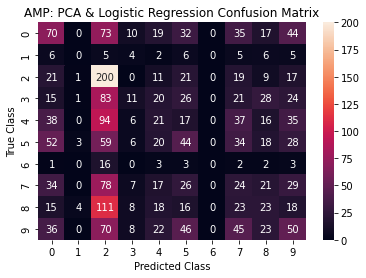

In [43]:
# Per Class Accuracy

# confusion matrix: 0=benign, 1=malignant
cfm = confusion_matrix(y_amp_test, preds_amp_lowdim)

# we can plot our confusion matrices, and toggle the values to appear
sns.heatmap(cfm, annot=True, fmt="d")
plt.title("AMP: PCA & Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

##MEL

Run PCA on MEL then fit logistic regression on top 500 components

In [44]:
# create our PCA object that will calculate the first 500 components.
pca = PCA(n_components=500)

# fit our PCA to the training data, and transform our data into its 500-dimensional representation
X_mel_train_pca = pca.fit_transform(X_mel_train_flat)

# let's check the shape of our lower dim representation
print(f"Lower-Dim PCA Representation Train Data Shape: {X_mel_train_pca.shape}")



Lower-Dim PCA Representation Train Data Shape: (5553, 500)


In [45]:
# train a logistic regression on the PCA transformed training data
lr_mel_pca = LogisticRegression(tol=0.0001, max_iter=1000, solver="saga", n_jobs=-1, verbose=1, C=2.0)
lr_mel_pca.fit(X_mel_train_pca, y_mel_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 190 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.2min finished


LogisticRegression(C=2.0, max_iter=1000, n_jobs=-1, solver='saga', verbose=1)

Checking accuracy for MEL

In [46]:
# transform our testing data (DO NOT FIT AGAIN!)
Xtest_mel_lowdim = pca.transform(X_mel_test_flat)

# make our test predictions
preds_mel_lowdim = lr_mel_pca.predict(Xtest_mel_lowdim)

# check our accuracy
print(f"Accuracy: {np.mean(preds_mel_lowdim == y_mel_test)}")

Accuracy: 0.3336367774237597


In [47]:
# Training Accuracy

# make our test predictions
preds_mel_lowdim_train = lr_mel_pca.predict(X_mel_train_pca)

# check our accuracy
print(f"Accuracy: {np.mean(preds_mel_lowdim_train == y_mel_train)}")

Accuracy: 0.46011165135962545


In [48]:
# generate our classification report: precision, recall, f1, etc.
print(classification_report(y_mel_test, preds_mel_lowdim))

              precision    recall  f1-score   support

           0       0.30      0.24      0.27       300
           1       0.44      0.41      0.43        39
           2       0.25      0.86      0.38       299
           3       0.50      0.19      0.28       229
           4       0.44      0.27      0.33       264
           5       0.51      0.36      0.42       264
           6       0.50      0.23      0.32        30
           7       0.18      0.11      0.13       236
           8       0.56      0.41      0.47       236
           9       0.42      0.17      0.24       300

    accuracy                           0.33      2197
   macro avg       0.41      0.32      0.33      2197
weighted avg       0.39      0.33      0.32      2197



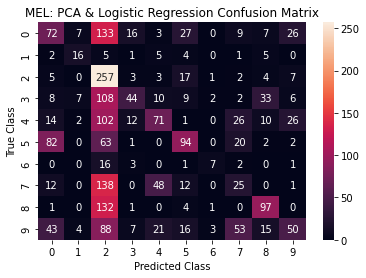

In [49]:
# Per Class Accuracy

# confusion matrix: 0=benign, 1=malignant
cfm = confusion_matrix(y_mel_test, preds_mel_lowdim)

# we can plot our confusion matrices, and toggle the values to appear
sns.heatmap(cfm, annot=True, fmt="d")
plt.title("MEL: PCA & Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Part 2: Random Forest

##AMP

In [14]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest
model = RandomForestClassifier(n_estimators=500, max_depth=32, n_jobs=-1)
model.fit(X_amp_train.reshape(X_amp_train.shape[0], -1), y_amp_train)

# make our predictions
rf_preds = model.predict(X_amp_test.reshape(X_amp_test.shape[0], -1))
print(np.mean(rf_preds == y_amp_test))

0.27309968138370505


In [15]:
# Training Accuracy

# make our test predictions
rf_preds_amp_train = model.predict(X_amp_train.reshape(X_amp_train.shape[0], -1))

# check our accuracy
print(f"Accuracy: {np.mean(rf_preds_amp_train == y_amp_train)}")

Accuracy: 1.0


In [16]:
# generate our classification report: precision, recall, f1, etc.
print(classification_report(y_amp_test, rf_preds))

              precision    recall  f1-score   support

           0       0.14      0.02      0.04       300
           1       0.00      0.00      0.00        39
           2       0.29      0.70      0.41       299
           3       0.38      0.29      0.33       229
           4       0.30      0.22      0.26       264
           5       0.37      0.46      0.41       264
           6       0.00      0.00      0.00        30
           7       0.19      0.39      0.26       236
           8       0.25      0.03      0.05       236
           9       0.20      0.14      0.17       300

    accuracy                           0.27      2197
   macro avg       0.21      0.23      0.19      2197
weighted avg       0.25      0.27      0.23      2197



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


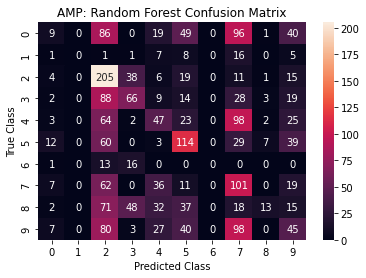

In [15]:
# Per Class Accuracy

# confusion matrix
cfm = confusion_matrix(y_amp_test, rf_preds)

# we can plot our confusion matrices, and toggle the values to appear
sns.heatmap(cfm, annot=True, fmt="d")
plt.title("AMP: Random Forest Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

##MEL

In [16]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest
model = RandomForestClassifier(n_estimators=500, max_depth=32, n_jobs=-1)
model.fit(X_mel_train_flat.reshape(X_mel_train_flat.shape[0], -1), y_mel_train)

# make our predictions
rf_preds_mel = model.predict(X_mel_test_flat.reshape(X_mel_test_flat.shape[0], -1))
print(np.mean(rf_preds_mel == y_mel_test))

0.48793809740555305


In [17]:
# Training Accuracy

# make our test predictions
rf_preds_mel_train = model.predict(X_mel_train.reshape(X_mel_train.shape[0], -1))

# check our accuracy
print(f"Accuracy: {np.mean(rf_preds_mel_train == y_mel_train)}")

Accuracy: 1.0


In [18]:
# generate our classification report: precision, recall, f1, etc.
print(classification_report(y_amp_test, rf_preds_mel))

              precision    recall  f1-score   support

           0       0.41      0.37      0.39       300
           1       0.82      0.23      0.36        39
           2       0.43      0.55      0.48       299
           3       0.54      0.44      0.49       229
           4       0.46      0.58      0.52       264
           5       0.55      0.44      0.48       264
           6       1.00      0.43      0.60        30
           7       0.47      0.47      0.47       236
           8       0.55      0.56      0.55       236
           9       0.51      0.55      0.53       300

    accuracy                           0.49      2197
   macro avg       0.57      0.46      0.49      2197
weighted avg       0.50      0.49      0.49      2197



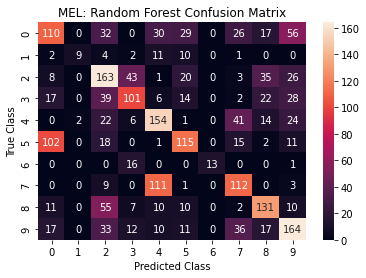

In [19]:
# Per Class Accuracy

# confusion matrix
cfm = confusion_matrix(y_mel_test, rf_preds_mel)

# we can plot our confusion matrices, and toggle the values to appear
sns.heatmap(cfm, annot=True, fmt="d")
plt.title("MEL: Random Forest Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

#Hyperparameters: PCA & Logistic Regression

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

##AMP

In [ ]:
# create our PCA object that will calculate the first 500 components.
pca = PCA(n_components=500)

# fit our PCA to the training data, and transform our data into its 500-dimensional representation
X_amp_train_pca = pca.fit_transform(X_amp_train)

# fit our PCA to shape of our lower dim representation
print(f"Lower-Dim PCA Representation Train Data Shape: {X_amp_train_pca.shape}")

Lower-Dim PCA Representation Train Data Shape: (5553, 500)


In [ ]:
# train a logistic regression on the PCA transformed training data for AMP
lr_pca = LogisticRegression(solver='saga', max_iter=1000)

#param_grid = {'solvers' : ['newton-cg', 'lbfgs', 'saga', 'liblinear', 'sag'], 'max_iter' : [1000], 'C' : [0.25, 0.5, 1, 1.5, 2.0],}

param_grid = {'C' : [0.25, 0.5, 1, 1.5, 2.0],}

LOG_CV = GridSearchCV(estimator=lr_pca, param_grid=param_grid, n_jobs=-1, cv=None, verbose=1)


LOG_CV.fit(X_amp_train_pca, y_amp_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


GridSearchCV(estimator=LogisticRegression(max_iter=1000, solver='saga'),
             n_jobs=-1, param_grid={'C': [0.25, 0.5, 1, 1.5, 2.0]}, verbose=1)

In [ ]:
# convert our results to a pd.DataFrame
LR_PCA_results = pd.DataFrame(LOG_CV.cv_results_).sort_values(by=['rank_test_score'])
LR_PCA_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,259.804150,0.769485,0.004304,0.001330,0.25,{'C': 0.25},0.151215,0.205221,0.186319,0.148649,0.164865,0.171254,0.021606,1
1,259.382307,0.395981,0.003326,0.000183,0.5,{'C': 0.5},0.150315,0.205221,0.187219,0.145946,0.163063,0.170353,0.022586,2
2,257.214392,0.420016,0.003185,0.000152,1,{'C': 1},0.148515,0.199820,0.184518,0.144144,0.160360,0.167472,0.021406,3
3,257.215710,0.691126,0.003159,0.000149,1.5,{'C': 1.5},0.148515,0.199820,0.184518,0.144144,0.160360,0.167472,0.021406,3
4,236.090034,42.735619,0.003168,0.000381,2.0,{'C': 2.0},0.148515,0.199820,0.184518,0.144144,0.160360,0.167472,0.021406,3


In [ ]:
best_params = LOG_CV.best_params_
print(best_params)
LOG_best = LogisticRegression(C=best_params['C'], solver='saga', max_iter=1000, n_jobs=-1)
LOG_best.fit(X_amp_train_pca, y_amp_train)

LOG_preds = LOG_best.predict(Xtest_amp_lowdim)
print(np.mean(LOG_preds == y_amp_test))

0.19708693673190714


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


##MEL

In [ ]:
# create our PCA object that will calculate the first 500 components.
pca = PCA(n_components=500)

# fit our PCA to the training data, and transform our data into its 500-dimensional representation
X_mel_train_pca = pca.fit_transform(X_mel_train_flat)

# let's check the shape of our lower dim representation
print(f"Lower-Dim PCA Representation Train Data Shape: {X_mel_train_pca.shape}")

Lower-Dim PCA Representation Train Data Shape: (5553, 500)


In [ ]:
# train a logistic regression on the PCA transformed training data
lr_mel_pca = LogisticRegression(solver='saga', max_iter=1000)

param_grid = {'C' : [0.25, 0.5, 1, 1.5, 2.0],}

LOG_CV_mel = GridSearchCV(estimator=lr_mel_pca, param_grid=param_grid, n_jobs=-1, cv=None, verbose=1)

LOG_CV_mel.fit(X_mel_train_pca, y_mel_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


GridSearchCV(estimator=LogisticRegression(max_iter=1000, solver='saga'),
             n_jobs=-1, param_grid={'C': [0.25, 0.5, 1, 1.5, 2.0]}, verbose=1)

In [ ]:
# convert our results to a pd.DataFrame
LR_PCA_mel_results = pd.DataFrame(LOG_CV_mel.cv_results_).sort_values(by=['rank_test_score'])
LR_PCA_mel_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,247.704926,25.791329,0.002786,0.000387,2.0,{'C': 2.0},0.318632,0.306931,0.342934,0.355856,0.323423,0.329555,0.017547,1
2,260.936611,5.760309,0.003037,0.000167,1,{'C': 1},0.318632,0.306031,0.342934,0.356757,0.322523,0.329375,0.018116,2
3,259.355205,6.105367,0.003107,0.000155,1.5,{'C': 1.5},0.318632,0.306031,0.342934,0.355856,0.323423,0.329375,0.017781,3
0,259.074061,7.027587,0.003066,0.000206,0.25,{'C': 0.25},0.318632,0.306031,0.342034,0.355856,0.323423,0.329195,0.017647,4
1,262.609247,7.578729,0.003082,0.000292,0.5,{'C': 0.5},0.318632,0.306031,0.342034,0.355856,0.322523,0.329015,0.017710,5


In [ ]:
best_params = LOG_CV_mel.best_params_
LOG_mel_best = LogisticRegression(C=best_params['C'], solver='saga', max_iter=1000, n_jobs=-1, verbose=1)
LOG_mel_best.fit(X_mel_train_pca, y_mel_train)

LOG_mel_preds = LOG_best.predict(Xtest_mel_lowdim)
print(np.mean(LOG_mel_preds == y_mel_test))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 203 seconds
0.09012289485662267


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.4min finished


#Hyperparameters: Random Forest

##AMP

In [ ]:
# Cross Validation for AMP
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# these are the settings that we will tune
param_grid = {'n_estimators' : [10, 50, 100, 250, 500], 
              'max_depth' : [4, 8, 16, 32, None],}

RF = RandomForestClassifier()
RF_CV_amp = GridSearchCV(estimator=RF, param_grid=param_grid, n_jobs=-1, cv=None, verbose=1)
RF_CV_amp.fit(X_amp_train.reshape(X_amp_train.shape[0], -1), y_amp_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 16, 32, None],
                         'n_estimators': [10, 50, 100, 250, 500]},
             verbose=1)

In [ ]:
# convert our results to a pd.DataFrame
RF_results_amp = pd.DataFrame(RF_CV_amp.cv_results_).sort_values(by=['rank_test_score'])
RF_results_amp.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,679.455931,3.160995,0.693880,0.090353,32,500,"{'max_depth': 32, 'n_estimators': 500}",0.239424,0.284428,0.236724,0.197297,0.241441,0.239863,0.027606,1
9,445.184086,0.810224,0.425143,0.037464,8,500,"{'max_depth': 8, 'n_estimators': 500}",0.242124,0.286229,0.234023,0.198198,0.238739,0.239863,0.028022,2
14,670.857227,4.870969,0.664580,0.091089,16,500,"{'max_depth': 16, 'n_estimators': 500}",0.243924,0.271827,0.238524,0.202703,0.239640,0.239324,0.021998,3
24,658.552652,54.363946,0.651243,0.055305,None,500,"{'max_depth': None, 'n_estimators': 500}",0.248425,0.294329,0.217822,0.194595,0.237838,0.238602,0.033380,4
18,339.023689,3.302985,0.392304,0.027124,32,250,"{'max_depth': 32, 'n_estimators': 250}",0.223222,0.266427,0.239424,0.181982,0.246847,0.231580,0.028421,5


In [ ]:
print(RF_CV_amp.best_params_)

{'max_depth': 32, 'n_estimators': 500}


In [ ]:
best_params_RF_amp = {'max_depth': 32, 'n_estimators': 500} #RF_CV_amp.best_params_
RF_best_amp = RandomForestClassifier(n_estimators=best_params_RF_amp['n_estimators'], max_depth=best_params_RF_amp['max_depth'], n_jobs=-1)
RF_best_amp.fit(X_amp_train.reshape(X_amp_train.shape[0], -1), y_amp_train)


# make our predictions
rf_preds_amp = RF_best_amp.predict(X_amp_test.reshape(X_amp_test.shape[0], -1))
print(np.mean(rf_preds_amp == y_amp_test))

0.27901684114701863


##MEL

In [ ]:
# Cross Validation for MEL
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# these are the settings that we will tune
param_grid = {'n_estimators' : [10, 50, 100, 250, 500], 
              'max_depth' : [4, 8, 16, 32, None],}

RF = RandomForestClassifier()
RF_CV = GridSearchCV(estimator=RF, param_grid=param_grid, n_jobs=-1, cv=None, verbose=1)
RF_CV.fit(X_mel_train_flat.reshape(X_mel_train_flat.shape[0], -1), y_mel_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 16, 32, None],
                         'n_estimators': [10, 50, 100, 250, 500]},
             verbose=1)

In [ ]:
# convert our results to a pd.DataFrame
RF_results = pd.DataFrame(RF_CV.cv_results_).sort_values(by=['rank_test_score'])
RF_results.head(5)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,292.675734,2.517874,0.506726,0.046267,32,500,"{'max_depth': 32, 'n_estimators': 500}",0.501350,0.617462,0.558956,0.560360,0.510811,0.549788,0.041572,1
24,284.839629,22.938680,0.514858,0.050433,None,500,"{'max_depth': None, 'n_estimators': 500}",0.486049,0.617462,0.566157,0.554955,0.510811,0.547087,0.045650,2
23,146.730288,1.200457,0.259215,0.030873,None,250,"{'max_depth': None, 'n_estimators': 250}",0.482448,0.613861,0.568857,0.557658,0.501802,0.544925,0.047434,3
18,147.547656,1.892503,0.275835,0.028589,32,250,"{'max_depth': 32, 'n_estimators': 250}",0.497750,0.604860,0.570657,0.556757,0.494595,0.544924,0.042786,4
14,287.941722,2.307194,0.512631,0.037585,16,500,"{'max_depth': 16, 'n_estimators': 500}",0.492349,0.603060,0.557156,0.552252,0.502703,0.541504,0.040178,5


In [ ]:
print(RF_CV.best_params_)

{'max_depth': 32, 'n_estimators': 500}


In [ ]:
best_params = RF_CV.best_params_
RF_best = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], n_jobs=-1)
RF_best.fit(X_mel_train_flat.reshape(X_mel_train_flat.shape[0], -1), y_mel_train)


# make our predictions
rf_preds = RF_best.predict(X_mel_test_flat.reshape(X_mel_test_flat.shape[0], -1))
print(np.mean(rf_preds == y_mel_test))

0.48930359581247157


# Part 3 (OPTIONAL EXTRA): PCA & Random Forest

In [20]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

##AMP

In [24]:
# create our PCA object that will calculate the first 500 components.
pca = PCA(n_components=250)

# fit our PCA to the training data, and transform our data into its 500-dimensional representation
X_amp_train_pca = pca.fit_transform(X_amp_train)

# fit our PCA to shape of our lower dim representation
print(f"Lower-Dim PCA Representation Train Data Shape: {X_amp_train_pca.shape}")

Lower-Dim PCA Representation Train Data Shape: (5553, 250)


In [25]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest
model = RandomForestClassifier(n_estimators=500, max_depth=32, n_jobs=-1)
model.fit(X_amp_train_pca.reshape(X_amp_train_pca.shape[0], -1), y_amp_train)

# transform our testing data (DO NOT FIT AGAIN!)
Xtest_amp_lowdim = pca.transform(X_amp_test)

# make our predictions
rf_preds = model.predict(Xtest_amp_lowdim.reshape(Xtest_amp_lowdim.shape[0], -1))
print(np.mean(rf_preds == y_amp_test))

0.28311333636777425


In [ ]:
# Training Accuracy
# make our test predictions
rf_preds_amp_train = model.predict(X_amp_train_pca.reshape(X_amp_train_pca.shape[0], -1))

# check our accuracy
print(f"Accuracy: {np.mean(rf_preds_amp_train == y_amp_train)}")

Accuracy: 1.0


In [ ]:
# generate our classification report: precision, recall, f1, etc.
print(classification_report(y_amp_test, rf_preds))

              precision    recall  f1-score   support

           0       0.14      0.02      0.04       300
           1       0.00      0.00      0.00        39
           2       0.29      0.70      0.41       299
           3       0.38      0.29      0.33       229
           4       0.30      0.22      0.26       264
           5       0.37      0.46      0.41       264
           6       0.00      0.00      0.00        30
           7       0.19      0.39      0.26       236
           8       0.25      0.03      0.05       236
           9       0.20      0.14      0.17       300

    accuracy                           0.27      2197
   macro avg       0.21      0.23      0.19      2197
weighted avg       0.25      0.27      0.23      2197



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


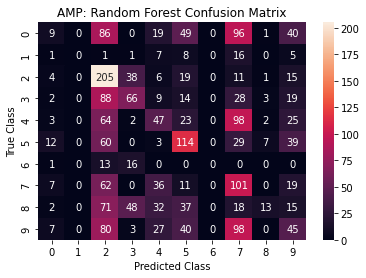

In [ ]:
# Per Class Accuracy

# confusion matrix
cfm = confusion_matrix(y_amp_test, rf_preds)

# we can plot our confusion matrices, and toggle the values to appear
sns.heatmap(cfm, annot=True, fmt="d")
plt.title("AMP: Random Forest Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()